# Part I - Loan Data Exploration
## by Kenechukwu Ifediorah

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
  - This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set.
  - The dataset is stored in a CSV file which has been downloaded and saved in this project folder for easy access.
  - The dataset generally contains 2 categories of listings. Loan listings `pre-2009` and Loan listings after 2009 period (`post-2009`). What this indicates is that some features of the listings are only available for pre-2009 listings while some other features are available for only post-2009 listings
  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### Loading data set

I'll load the data now and perform preliminary wrangling

In [2]:
loan = pd.read_csv('prosperLoanData.csv')
loan.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
# Cheking structure of the dataset
loan.shape

(113937, 81)

In [4]:
# List all columns of dataset, their datatypes and check for missing values
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# Change data types of date columns to date
loan[['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate']] = loan[['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate']].apply(pd.to_datetime)

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [7]:
#Change `ProsperScore` to string and range 1-11 to become 0-10
loan['ProsperScore'] = loan['ProsperScore'].fillna(-1).astype(int).astype(str)
loan['ProsperScore'] = loan['ProsperScore'].apply(lambda x: str(int(x)-1))
loan['ProsperScore'] = loan['ProsperScore'].replace('-2', np.nan)

# Change ProsperScore and IncomeRange to ordered categorical data
ordinal_dict = {'ProsperScore': ['0','1','2','3','4','5','6','7','8','9','10'],
                    'IncomeRange': ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_dict[var])
    loan[var] = loan[var].astype(ordered_var)

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [9]:
#Change LoanFirstDefaultedCycleNumber to str
loan['LoanFirstDefaultedCycleNumber'] = loan['LoanFirstDefaultedCycleNumber'].fillna(-1).astype(int).astype(str).replace('-1',np.nan)

In [10]:
#Convert ListingCategory from numerical data to Categorical
loan['ListingCategory (numeric)'] = loan['ListingCategory (numeric)'].replace(
                                                                    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                                                                    ['Not Available','Debt Consolidation','Home Improvement','Business',
                                                                     'Personal Loan','Student Use','Auto','Other','Baby&Adoption','Boat',
                                                                     'Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses',
                                                                     'Large Purchases','Medical/Dental','Motorcycle','RV','Taxes','Vacation',
                                                                     'Wedding Loans'])

In [11]:
#Rename the column
loan.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

In [12]:
loan['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

Since CreditRating for pre-2009 dlistings are stored in the `CreditGrade` column and that for post-2009 listings are stored in the `ProsperRating (Alpha)` column, I'll rght a function to merge this two columns

In [13]:
# Function to merge columns
def cred(row):
    if pd.notna(row['ProsperRating (Alpha)']):
        return row['ProsperRating (Alpha)']
    if pd.notna(row['CreditGrade']):
        return row['CreditGrade']
    else: return np.nan

loan['CreditRating'] = loan.apply(lambda x: cred(x), axis=1)

In [14]:
# Now convert the credit rating to ordered categorical data

dict = {'CreditRating': ['AA','A','B','C','D','E','HR','NC']}

for var in dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = dict[var])
    loan[var] = loan[var].astype(ordered_var)

In [15]:
loan.CreditRating.unique()

['C', 'A', 'HR', 'D', 'B', 'E', 'AA', NaN, 'NC']
Categories (8, object): ['AA' < 'A' < 'B' < 'C' < 'D' < 'E' < 'HR' < 'NC']

**Now the data is cleaner for exploration**

In [16]:
loan.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreditRating
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,C
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,A
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,HR
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,A
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,D


### Structure of the dataset:
  - The dataset has 113,937 loan entries with the features (LoanStatus, BorrowerAPR, BorrowerRate, EstimatedReturn, Term, ListingCategory, LoanOriginalAmount, etc)
  - There is also Borrower data with features like (Occupation, EmploymentStatus, BorrowerState, StatedMonthlyIncome, etc)
  - There are 81 columns in the dataset which means there are a lot of features to explore

### Main feature(s) of interest in the dataset:
  - I am interested in finding out what features will best predict or influence the Final outcome status of a loan
  - Also what factors affect Borrower's interest rate and APR
  - Finally, I'd like to know if ther are  differences between loans depending on how large or small the original amount was.

  - I do think the borrower data (Credit score, employment status, employment status duration, etc) will have effect on the loan status and some other factors like original loan amount might play a role too
  - I definitely think there would be differences between loan based on original loan amount, for example, interest rate, Investors, etc.

## Univariate Exploration


#### What is the distribution of loan status?

In [17]:
bar_color = sb.color_palette()[0]

In [18]:
status_order = loan.value_counts('LoanStatus').index

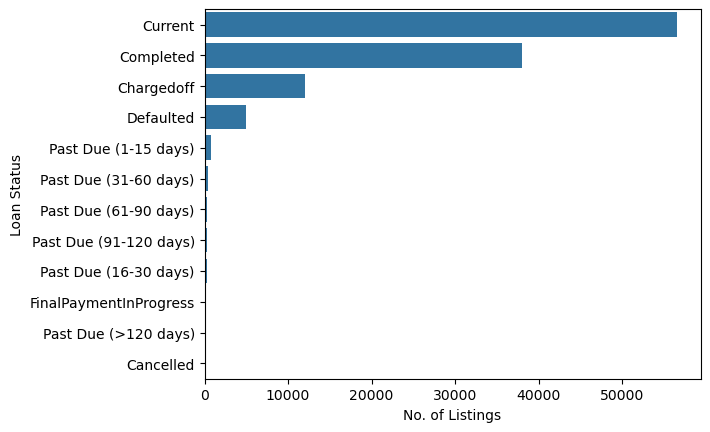

In [19]:
sb.countplot(loan, y = 'LoanStatus', color=bar_color, order = status_order);
plt.xlabel('No. of Listings')
plt.ylabel('Loan Status');

We can tell that the status is majorly distributed over 4 statuses. Over 50000 listings are still open, about 40000 are completed, over 10000 are charged off and less than 10000 are defaulted. The remaining status have negligible number of listings

**Now let us look at a distribution of the Borrower's interest rate and Borrower's APR(Annual Percentage Rate)**

In [20]:
loan['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

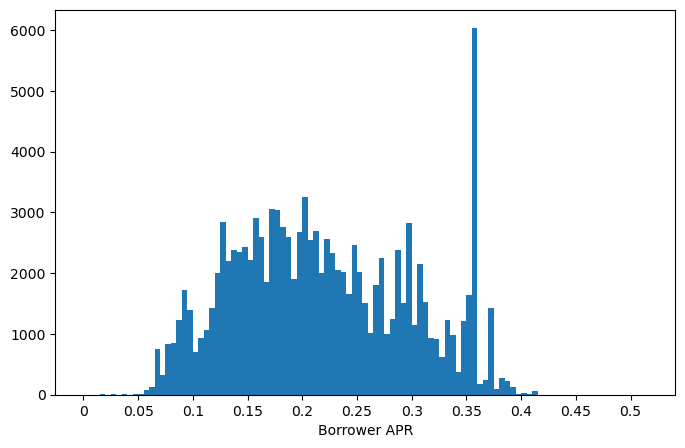

In [21]:
# starting with a standard-scaled plot
binsize = 0.005
bins = np.arange(0, loan['BorrowerAPR'].max()+binsize, binsize)
ticks = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5] 
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.xticks(ticks, labels);
plt.show();

We can see that majority of the listings have Borrower APR between **0.1 and 0.4** but with a spike at the peak around the **0.36** mark.

Now for the Borrower interest rate

In [22]:
loan['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

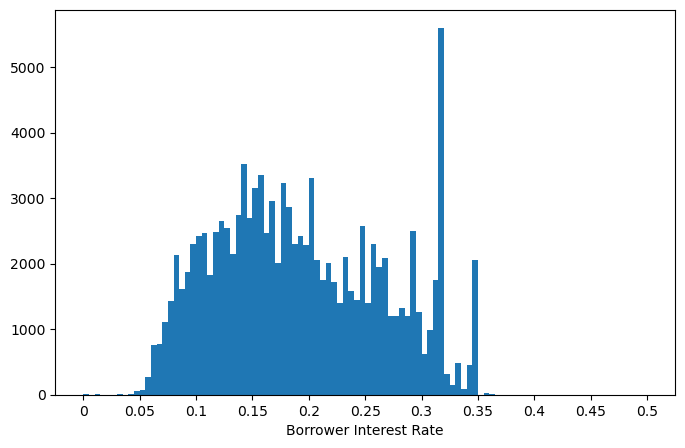

In [23]:
# starting with a standard-scaled plot
binsize = 0.005
bins = np.arange(0, loan['BorrowerRate'].max()+binsize, binsize)
ticks = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5] 
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'BorrowerRate', bins = bins)
plt.xlabel('Borrower Interest Rate')
plt.xticks(ticks, labels);
plt.show();

As seen, majority of the interest rate lies between **0.1  and 0.3**. Another spike is noticed around the **0.32** mark.

**Now let's see a distribution of the original loan amount**

In [24]:
loan['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

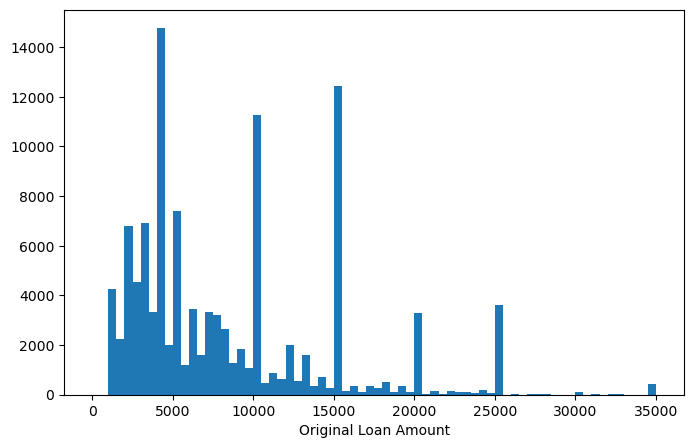

In [25]:
# starting with a standard-scaled plot
binsize = 500
bins = np.arange(0, loan['LoanOriginalAmount'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Original Loan Amount')
plt.show();

We can notice spikes around the multiples of 5000 and also notice the concentration between 0 and 10,000, with only a few listings 20,000 mark.

**Let's look at the features we are looking at** 

- Plotting distribution of Employment Status

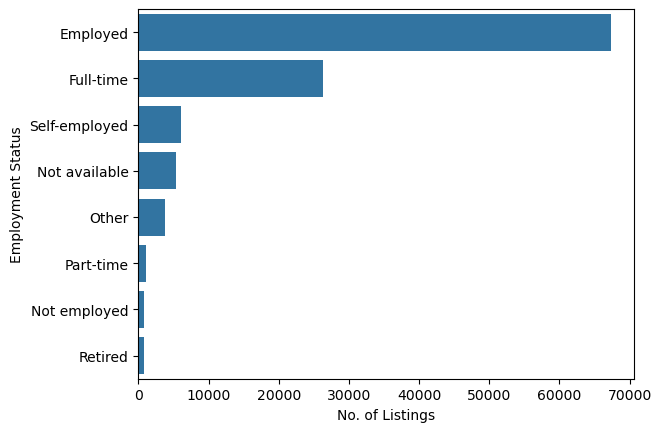

In [26]:
sb.countplot(loan, y = 'EmploymentStatus', color=bar_color, order = loan.value_counts('EmploymentStatus').index);
plt.xlabel('No. of Listings')
plt.ylabel('Employment Status');

Majority of the borrowers have a stable means of income

**Let's look at the Credit Rating**

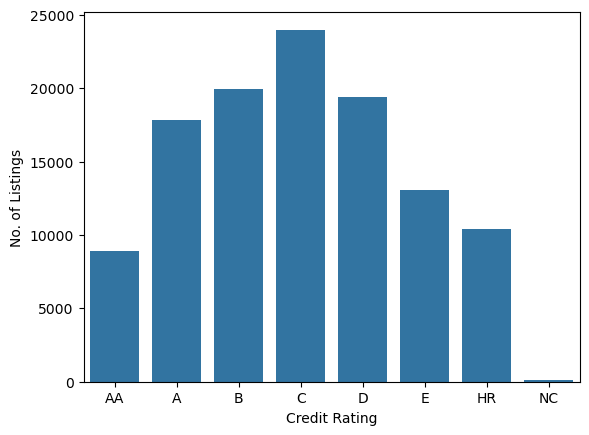

In [27]:
sb.countplot(loan, x = 'CreditRating', color=bar_color);
plt.ylabel('No. of Listings')
plt.xlabel('Credit Rating');

We can see that the Credit rating is fairly evenly distributed

**Next, we see the distribution of borrower's income range**

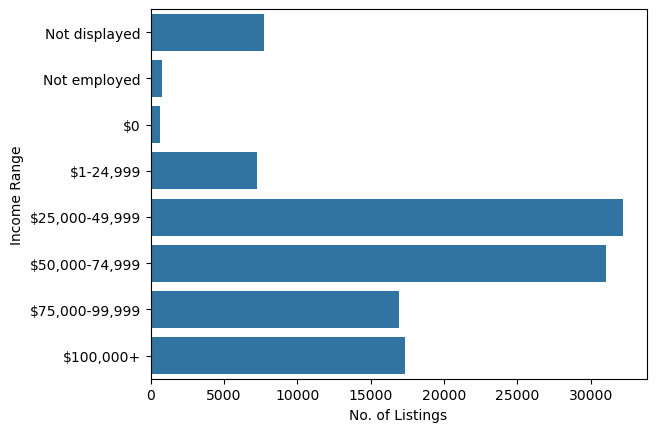

In [28]:
sb.countplot(loan, y = 'IncomeRange', color=bar_color);
plt.xlabel('No. of Listings')
plt.ylabel('Income Range');

We can see that majority of the borrowers make between **25000 - 75000**

**Let's distribute the listings by Listing Category and Prosper Score**

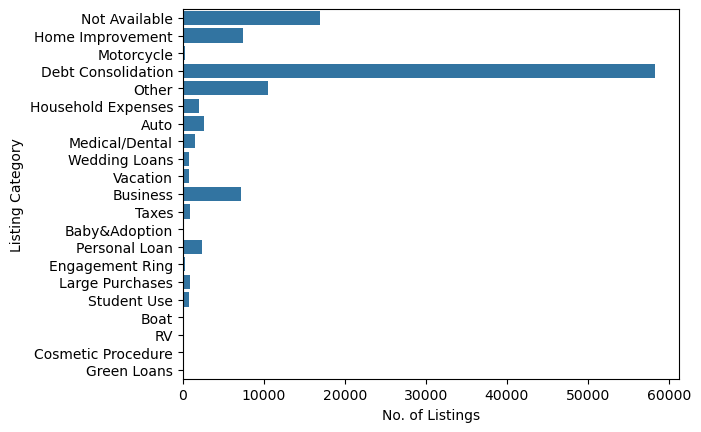

In [29]:
sb.countplot(loan, y = 'ListingCategory', color=bar_color);
plt.xlabel('No. of Listings')
plt.ylabel('Listing Category');

We can see that majority of the loans were for debt consolidation

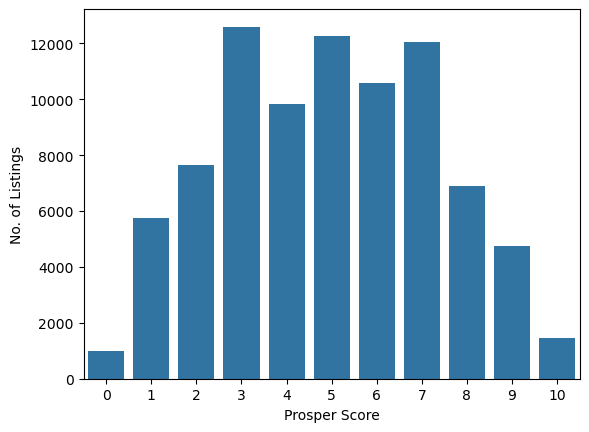

In [30]:
sb.countplot(loan, x = 'ProsperScore', color=bar_color);
plt.ylabel('No. of Listings')
plt.xlabel('Prosper Score');

We can see a tri modal distribution with peaks at 3, 5 and 7



- We see that a lot of the listings were distributed between Completed, Current, Charged Off and Defaulted. I would like to dive deeper to see if there are features peculiar to the defaulted and chargedOff loan
- The Borrower APR and Borrower rate are similarly distributed with a spike towards the maximum value. I would also like to further explore this to know the reasons for the spike
- The original loan amount is also seen to be majorly in the range of 0-20000 with some outliers around the 30000 mark. The plot is multimodal with the modes at the areas od multiples of 5000


- We notice an even distribution of the credit score. We can also see that majority of the borrowers have a stable means of income

## Bivariate Exploration

- Now let's see if there are relationships between some of these features we have.




**First, let's look at the relationship between employment status and Loan status to see the distribution of employment status for the different loan status**

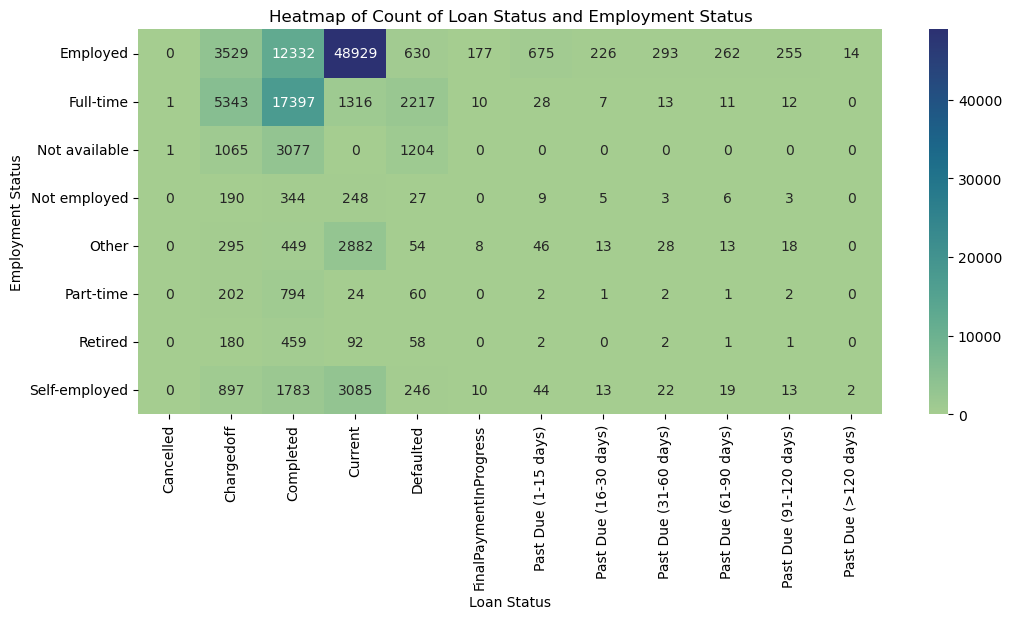

In [31]:
plt.figure(figsize = [12, 5])
# pivot_table = loan.pivot_table(index="EmploymentStatus", columns="LoanStatus", aggfunc=len, fill_value=0)
# sb.heatmap(pivot_table, cmap='vlag_r');
count_table = pd.crosstab(loan['EmploymentStatus'], loan['LoanStatus'])
count_table.sort_index(level=0, ascending=True, inplace=True)
sb.heatmap(count_table, annot=True, fmt='d',cmap='crest')
plt.ylabel('Employment Status')
plt.xlabel('Loan Status')
plt.title('Heatmap of Count of Loan Status and Employment Status')
plt.show();

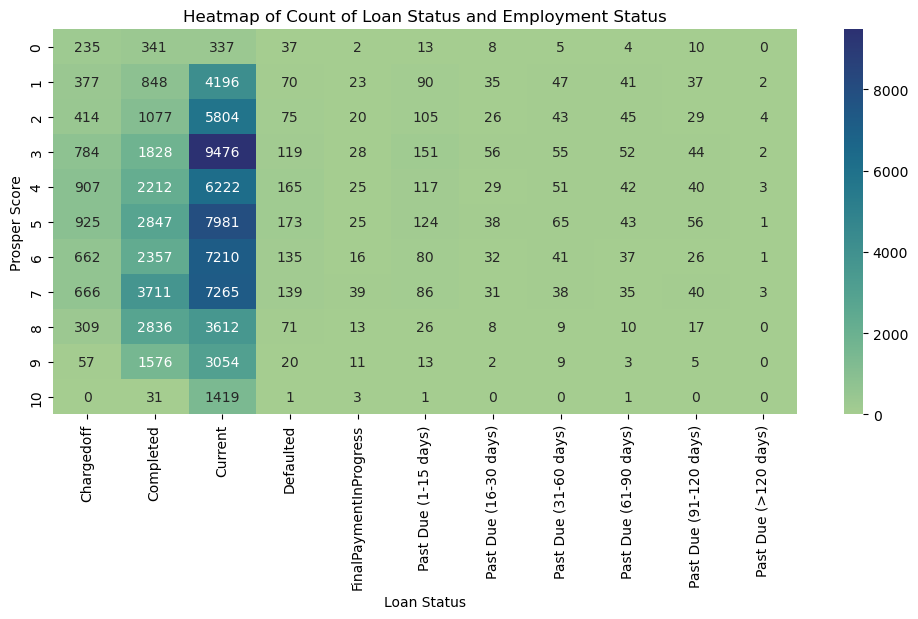

In [39]:
plt.figure(figsize = [12, 5])
# pivot_table = loan.pivot_table(index="EmploymentStatus", columns="LoanStatus", aggfunc=len, fill_value=0)
# sb.heatmap(pivot_table, cmap='vlag_r');
count_table = pd.crosstab(loan['ProsperScore'], loan['LoanStatus'])
count_table.sort_index(level=0, ascending=True, inplace=True)
sb.heatmap(count_table, annot=True, fmt='d',cmap='crest')
plt.ylabel('Prosper Score')
plt.xlabel('Loan Status')
plt.title('Heatmap of Count of Loan Status and Employment Status')
plt.show();

**Let's see the relationship between original loan amount and Income range**

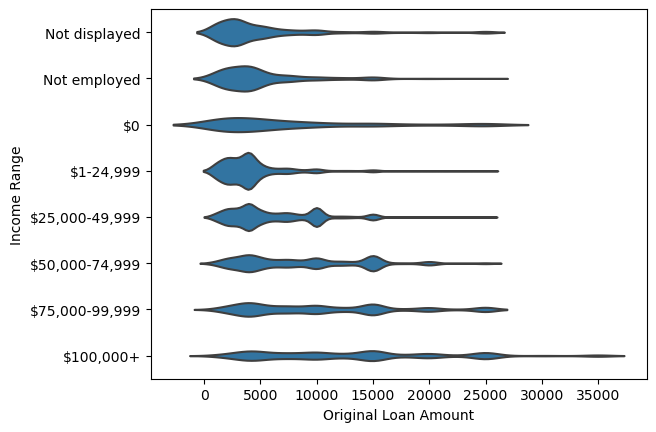

In [32]:
sb.violinplot(data=loan, y='IncomeRange', x='LoanOriginalAmount', color=bar_color, inner=None);
plt.xlabel('Original Loan Amount')
plt.ylabel('Income Range');

- We can see that this further explains the data we had earlier around the 35000 area. We see that people who earn over 100,000 USD are those that borrowed this much money. We can see that borrowers with higher income have a tendency to borrow higher amounts but also borrow less.

- Furthermore, we can see that people that earn between 0-5,000 borrow more often even though they tend to borrow lesser amounts.


**Now let's look at the relationship between original loan amount and Loan Status**

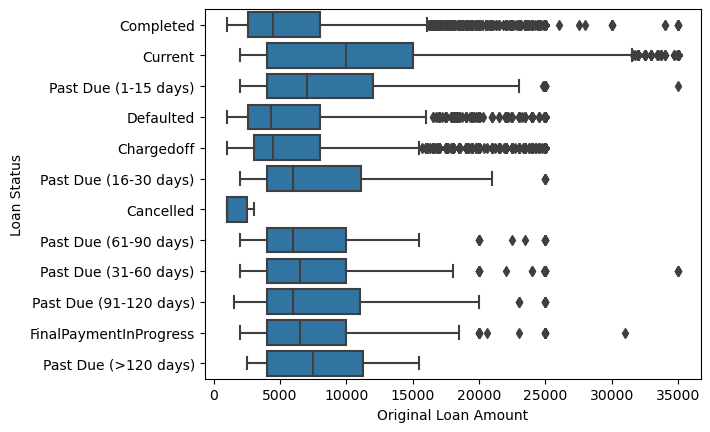

In [33]:
sb.boxplot(data=loan, y='LoanStatus', x='LoanOriginalAmount', color=bar_color);
plt.xlabel('Original Loan Amount')
plt.ylabel('Loan Status');

**Let's take a quick look at the Borrower interest rate and Borrower APR**

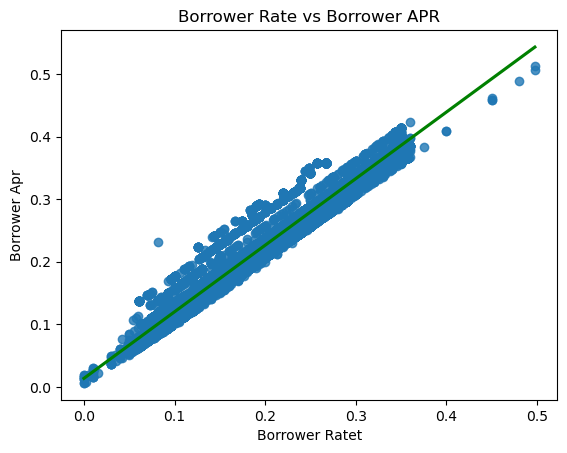

In [35]:
# Scatter plot using seaborn

sb.regplot(data = loan, x='BorrowerRate', y='BorrowerAPR',scatter_kws={"color": bar_color}, line_kws={"color": "green"})
plt.xlabel('Borrower Ratet')
plt.title('Borrower Rate vs Borrower APR')
plt.ylabel('Borrower Apr');

Borrower rate and Borrower APR are directly proportional and almost always equal. The line plot pretty much shows this already.

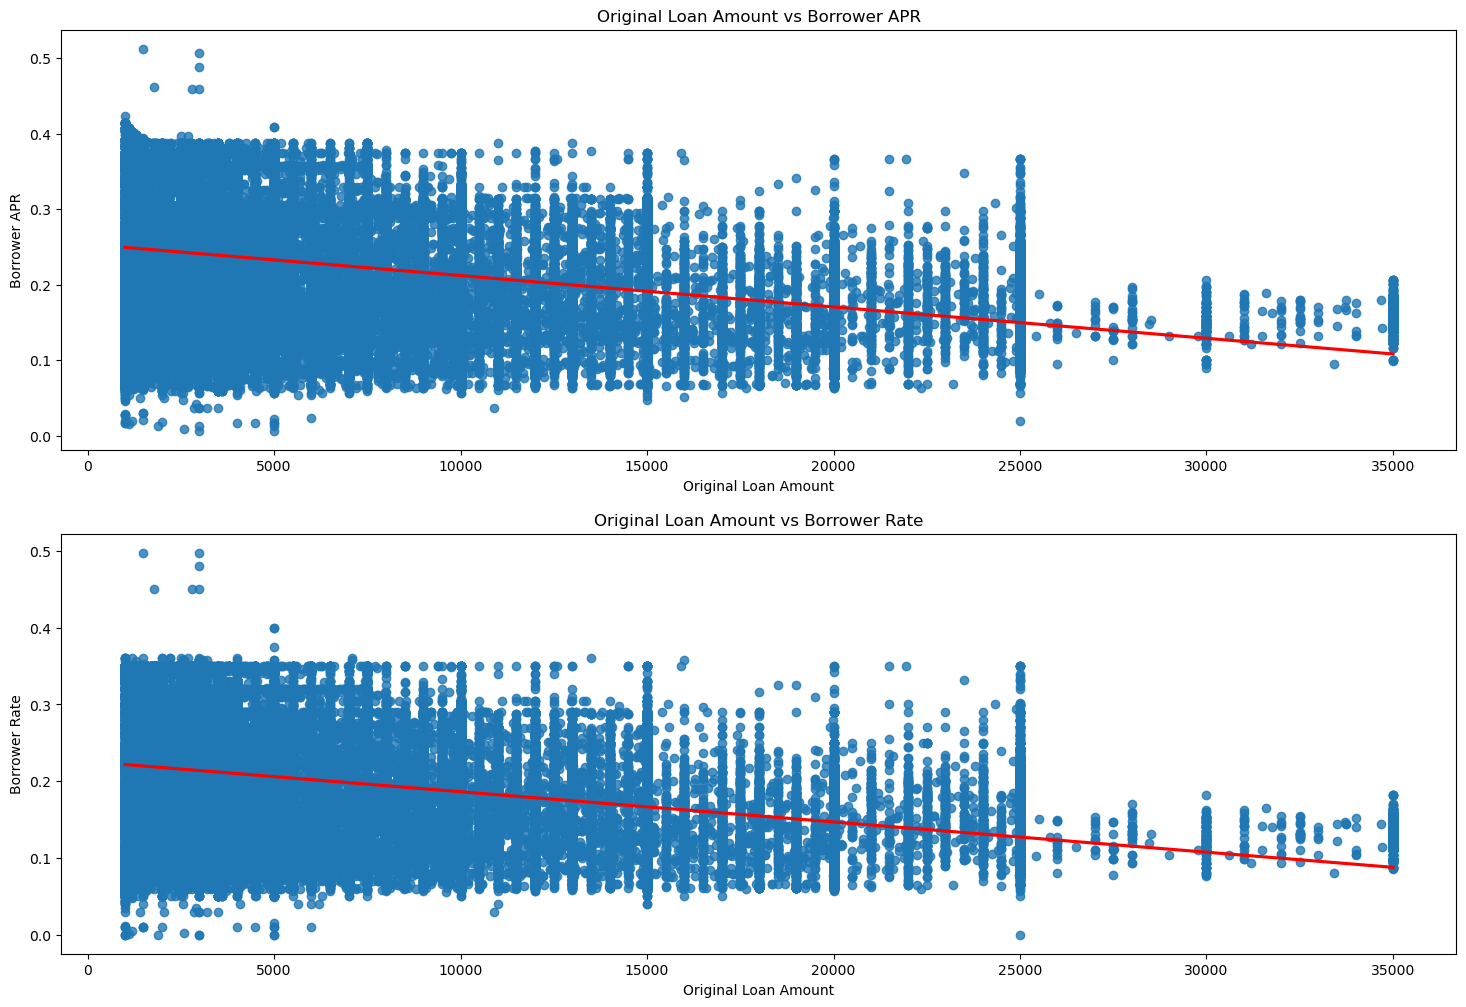

In [36]:
# Scatter plot using seaborn
plt.figure(figsize = [18, 12])
plt.subplot(2, 1, 1)
sb.regplot(data = loan, x='LoanOriginalAmount', y='BorrowerAPR', scatter_kws={"color": bar_color}, line_kws={"color": "red"})
plt.xlabel('Original Loan Amount')
plt.title('Original Loan Amount vs Borrower APR')
plt.ylabel('Borrower APR');

plt.subplot(2, 1, 2)
sb.regplot(data = loan, x='LoanOriginalAmount', y='BorrowerRate', scatter_kws={"color": bar_color}, line_kws={"color": "red"})
plt.xlabel('Original Loan Amount')
plt.title('Original Loan Amount vs Borrower Rate')
plt.ylabel('Borrower Rate');

The line plot on both scatter plots indicates that there is a direct relation ship between Borrower APR/Borrower Rate and Original loan amount. **The interest rate decreases as the original loan amount increases.**


**Now let's see if there's a relationship between Original Loan amount and Credit rating**

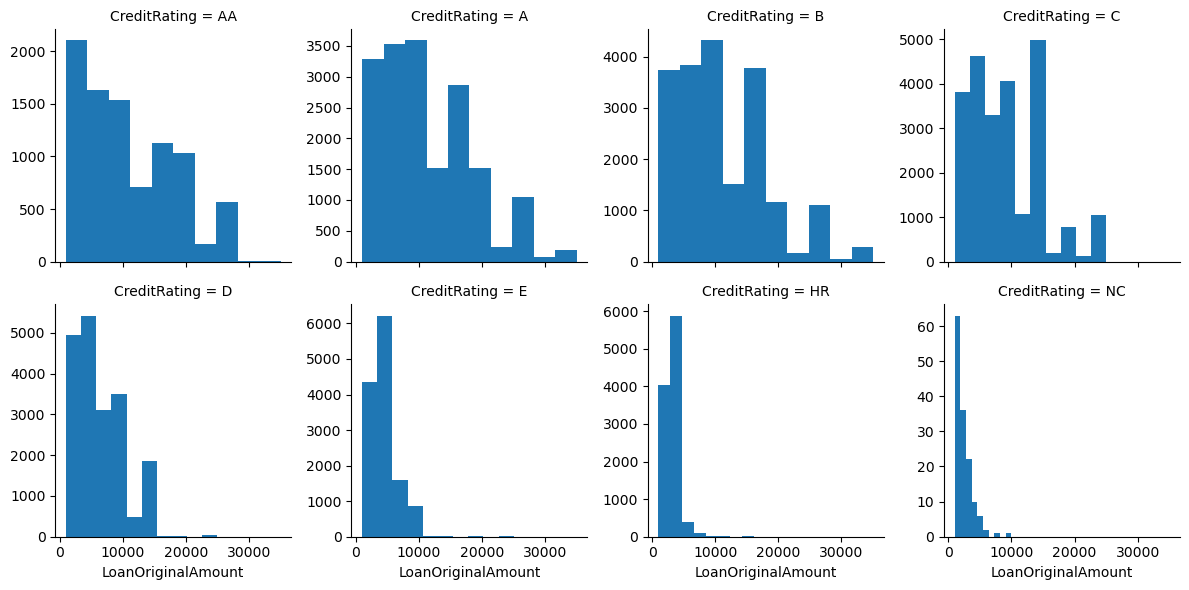

In [37]:
# plot the distribution of original loan amount for every credit rating.
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = loan, col = 'CreditRating', col_wrap=4, sharey=False)
g.map(plt.hist, "LoanOriginalAmount")

plt.show()

We can see that as the credit rating reduces, there is a corresponding decrease in the loan amount.



- The line plot on both scatter plots indicates that there is a direct relation ship between Borrower APR/Borrower Rate and Original loan amount. The interest rate decreases as the original loan amount increases.
- People with higher income have a tendency to borrow higher amounts but also borrow less while people that earn between 0-5,000 borrow more often even though they tend to borrow lesser amounts.
- Borrower rate and Borrower APR are directly proportional and almost always equal. The line plot pretty much shows this already.


## Multivariate Exploration

- Let's investigate further now. Let's investigate further into the facet grid and relationship between original loan amount and interest rate. Let's break categorize this by credit rating


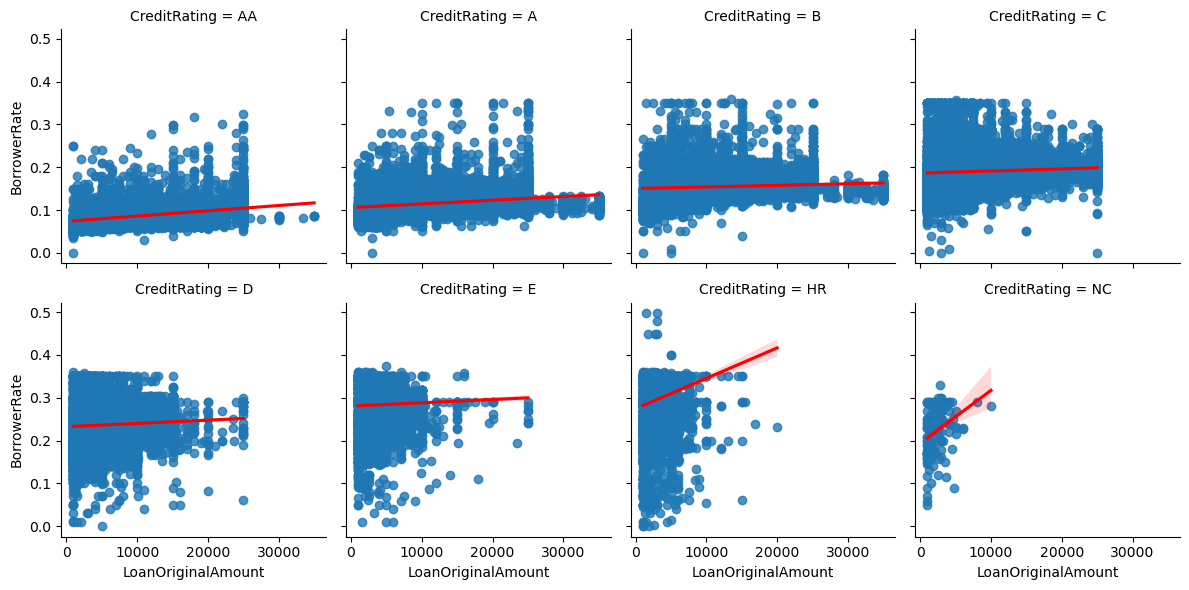

In [38]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = loan, col = 'CreditRating', col_wrap=4, sharey=True)
g.map(sb.regplot, "LoanOriginalAmount", 'BorrowerRate', scatter_kws={"color": bar_color}, line_kws={"color": "red"})

plt.show()

We can see that borrowers with the highest credit ratings have the lowest interest rate and those with lower credit ratings have a higher interest rate which increases as the loan amount increases.



- There is a direct correctation between Borrower APR and Borrower Rate


- It was quite surprising that people with low credit rate had higher interest rates

## Conclusions

Here are some of the findings after exploring this dataset
- Majority of the borrowers have a stable source of income. They were either employed, full time workers or self-employed
- Credit rating is not really a major deciding factor in distribution of loan
- Majority of borrowers earn betweeb 25000 - 75000 USD
- Most of the loans were taken for debt consolidation
- Most of the ChargedOff and Defaulted loans were taken by employed borrowers
- The line plot on both scatter plots indicates that there is a direct relation ship between Borrower APR/Borrower Rate and Original loan amount. The interest rate decreases as the original loan amount increases.
- People with higher income have a tendency to borrow higher amounts but also borrow less while people that earn between 0-5,000 borrow more often even though they tend to borrow lesser amounts.
- Borrower rate and Borrower APR are directly proportional and almost always equal. The line plot pretty much shows this already.
- We can see that borrowers with the highest credit ratings have the lowest interest rate and those with lower credit ratings have a higher interest rate which increases as the loan amount increases.